Import functionality

In [1]:
from unit import Unit
from team import Team
from battle import Battle

Import libraries

In [2]:
import random
import matplotlib.pyplot as plt

Example 1: Observe changepoint

In [3]:
for d in range(700, 800+1, 5):
    d = d/100
    attackers = Team(name="Attackers", units=[Unit(hp=60, damage=15) for _ in range(5)])
    defenders = Team(name="Defenders", units=[Unit(hp=135, damage=d) for _ in range(5)])
    b = Battle(attackers, defenders, print_console=False)
    outcomes = []

    for _ in range(10000):
        outcomes.append(b.simulate(length=15, reset_all=True))
    print(f"{d}: {sum(outcomes)/len(outcomes)}")

7.0: 0.6757
7.05: 0.6555
7.1: 0.673
7.15: 0.6663
7.2: 0.6701
7.25: 0.6629
7.3: 0.6702
7.35: 0.6648
7.4: 0.6635
7.45: 0.6735
7.5: -0.609
7.55: -0.6092
7.6: -0.5912
7.65: -0.5998
7.7: -0.6207
7.75: -0.6081
7.8: -0.609
7.85: -0.6062
7.9: -0.5968
7.95: -0.6091
8.0: -0.6095


Example 2: Confirm value of changepoint

In [4]:
D1 = 7.5 - 1e-15

attackers = Team(name="Attackers", units=[Unit(hp=60, damage=15) for _ in range(5)])
defenders = Team(name="Defenders", units=[Unit(hp=135, damage=D1) for _ in range(5)])

b = Battle(attackers, defenders, print_console=False)
outcomes = []

for _ in range(10000):
    outcomes.append(b.simulate(length=15, reset_all=True))
print(f"{D1}: {sum(outcomes)/len(outcomes)}")


D2 = 7.5 - 1e-16

attackers = Team(name="Attackers", units=[Unit(hp=60, damage=15) for _ in range(5)])
defenders = Team(name="Defenders", units=[Unit(hp=135, damage=D2) for _ in range(5)])

b = Battle(attackers, defenders, print_console=False)
outcomes = []

for _ in range(10000):
    outcomes.append(b.simulate(length=15, reset_all=True))

print(f"{D2}: {sum(outcomes)/len(outcomes)}")

7.499999999999999: 0.6746
7.5: -0.6051


Example 3: Plot results

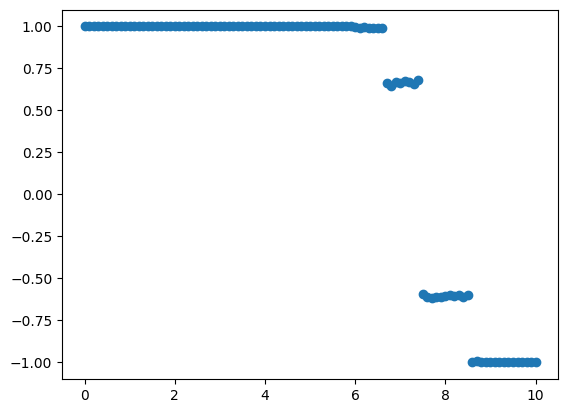

In [9]:
x = []
y = []

for d in range(0, 100+1):
    d = d/10
    attackers = Team(name="Attackers", units=[Unit(hp=60, damage=15) for _ in range(5)])
    defenders = Team(name="Defenders", units=[Unit(hp=135, damage=d) for _ in range(5)])
    b = Battle(attackers, defenders, print_console=False)

    outcomes = []
    for _ in range(10000):
        outcomes.append(b.simulate(length=100, reset_all=True))
    x.append(d)
    y.append(sum(outcomes)/len(outcomes))

plt.scatter(x, y)
plt.show()

Example 4: Generate random team statistics

In [6]:
for _ in range(100):
    attackers = Team(name="Attackers", units=[Unit(hp=random.randint(20, 100), damage=random.randint(5, 30)) for _ in range(5)], strategy="Target_Most_D")
    defenders = Team(name="Defenders", units=[Unit(hp=random.randint(20, 100), damage=random.randint(5, 30)) for _ in range(5)], strategy="Target_Least_HP")

    b = Battle(attackers, defenders, print_console=False)
    print(b.simulate(length=100, reset_all=True))

1
1
-1
-1
1
-1
1
1
1
1
1
1
-1
1
-1
1
1
1
1
1
1
1
1
1
1
1
1
-1
1
1
1
-1
1
1
1
1
1
-1
1
1
1
1
1
1
-1
1
-1
1
1
1
1
1
1
-1
1
1
1
1
1
-1
1
1
1
-1
1
1
1
-1
-1
-1
1
1
1
-1
1
-1
-1
1
1
1
1
1
-1
-1
1
1
-1
1
-1
-1
1
1
1
1
1
1
1
1
1
1


Example 5: Compare different team strategies

In [7]:
strategies = ["Target_Random", "Target_Least_HP", "Target_Most_D", "Target_Most_D/HP"]

for s1 in strategies:
    for s2 in strategies:
        attackers = Team(name="Attackers", units=[Unit(hp=60, damage=15) for _ in range(5)] + [Unit(hp=100, damage=20)], strategy=s1)
        defenders = Team(name="Defenders", units=[Unit(hp=60, damage=15) for _ in range(4)] + [Unit(hp=100, damage=20) for _ in range(2)], strategy=s2)

        outcomes = []
        for _ in range(10000):
            b = Battle(attackers, defenders, print_console=False)
            outcomes.append(b.simulate(length=100, reset_all=True))

        print(f"{s1} vs {s2}: {sum(outcomes)/len(outcomes)}")

Target_Random vs Target_Random: 0.2306
Target_Random vs Target_Least_HP: -0.9998
Target_Random vs Target_Most_D: -0.9904
Target_Random vs Target_Most_D/HP: -0.9998
Target_Least_HP vs Target_Random: 1.0
Target_Least_HP vs Target_Least_HP: 1.0
Target_Least_HP vs Target_Most_D: 1.0
Target_Least_HP vs Target_Most_D/HP: 1.0
Target_Most_D vs Target_Random: 0.9876
Target_Most_D vs Target_Least_HP: -1.0
Target_Most_D vs Target_Most_D: -1.0
Target_Most_D vs Target_Most_D/HP: -1.0
Target_Most_D/HP vs Target_Random: 1.0
Target_Most_D/HP vs Target_Least_HP: 1.0
Target_Most_D/HP vs Target_Most_D: 1.0
Target_Most_D/HP vs Target_Most_D/HP: 1.0
